In [ ]:
!pip install nltk
!pip install -U spacy

In [ ]:
!pwd

/content


In [ ]:
!python3 -m spacy download en

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/My Drive/02_Apple_v_Samsung_LDA_test'

/content/drive/My Drive/02_Apple_v_Samsung_LDA_test


In [ ]:
!ls

'Apple, Inc. v. Samsung Elecs. Co., 2012-1105 (Fed. Cir. May 14, 2012).txt'
'Apple Inc. v. Samsung Elecs. Co., 2012-1507 (Fed. Cir. Oct. 11, 2012).txt'
'Apple Inc. v. Samsung Elecs. Co., 258 F. Supp. 3d 1013 (N.D. Cal. 2017).txt'
'Apple, Inc. v. Samsung Elecs. Co., 678 F.3d 1314 (Fed. Cir. 2012).txt'
'Apple Inc. v. Samsung Elecs. Co., 695 F.3d 1370 (Fed. Cir. 2013)(1).txt'
'Apple Inc. v. Samsung Elecs. Co., 695 F.3d 1370 (Fed. Cir. 2013).txt'
'Apple Inc. v. Samsung Elecs. Co., 727 F.3d 1214 (Fed. Cir. 2013).txt'
'Apple Inc. v. Samsung Elecs. Co., 735 F.3d 1352 (Fed. Cir. 2013).txt'
'Apple Inc. v. Samsung Elecs. Co., 786 F.3d 983 (Fed. Cir. 2015)(1).txt'
'Apple Inc. v. Samsung Elecs. Co., 786 F.3d 983 (Fed. Cir. 2015).txt'
'Apple Inc. v. Samsung Elecs. Co., 816 F.3d 788 (Fed. Cir. 2016)(1).txt'
'Apple Inc. v. Samsung Elecs. Co., 816 F.3d 788 (Fed. Cir. 2016).txt'
'Apple Inc. v. Samsung Elecs. Co., 839 F.3d 1034 (Fed. Cir. 2016).txt'
'Apple Inc. v. Samsung Elecs. Co., 888 F. Supp. 2d 976

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:

from nltk.tokenize import sent_tokenize # 切成一個個句子

text='This makes the first document. This document made the second document. And this is the third one. Is this the first document?'
sent_tokenize_list = sent_tokenize(text.lower())
print(sent_tokenize_list)
from nltk.tokenize import word_tokenize # 把一個句子中的字&符號都切出來
word_tokenize_list = word_tokenize("I mice mouse made world. This make's the first document.".lower())
print(word_tokenize_list)

['this makes the first document.', 'this document made the second document.', 'and this is the third one.', 'is this the first document?']
['i', 'mice', 'mouse', 'made', 'world', '.', 'this', 'make', "'s", 'the', 'first', 'document', '.']


In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')+[u'',u':',u'.',u'"',u'!',u'?',u"'",u","]) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence) 

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import spacy

In [ ]:
import os
files = [f for f in os.listdir('./') if os.path.isfile(f) and f.find('.txt')>=0]
 
for f in files:
  print(f)

Apple Inc. v. Samsung Elecs. Co., Case No. C 11-1846 LHK (PSG) (N.D. Cal. Apr. 12, 2012).txt
Apple, Inc. v. Samsung Elecs. Co., Case No. C 11-1846 LHK (PSG) (N.D. Cal. Nov. 7, 2012).txt
Apple Inc. v. Samsung Elecs. Co., 888 F. Supp. 2d 976 (N.D. Cal. 2012).txt
Apple Inc. v. Samsung Elecs. Co., Case No. C 11-cv-1846 LHK (PSG) (N.D. Cal. Mar. 8, 2012).txt
Apple Inc. v. Samsung Elecs. Co., Case No. C 11-cv-1846 LHK (PSG) (N.D. Cal. Mar. 20, 2012).txt
Apple Inc. v. Samsung Elecs. Co., No. 11-CV-01846-LHK (N.D. Cal. Mar. 2, 2016).txt
Apple Inc. v. Samsung Elecs. Co., 695 F.3d 1370 (Fed. Cir. 2013)(1).txt
Apple Inc. v. Samsung Elecs. Co., Ltd., 809 F.3d 633 (Fed. Cir. 2015)(1).txt
Apple Inc. v. Samsung Elecs. Co., 816 F.3d 788 (Fed. Cir. 2016)(1).txt
Apple Inc. v. Samsung Elecs. Co., 786 F.3d 983 (Fed. Cir. 2015)(1).txt
Apple Inc. v. Samsung Elecs. Co., 2012-1507 (Fed. Cir. Oct. 11, 2012).txt
Apple, Inc. v. Samsung Elecs. Co. Case No.- 11-CV-01846-LHK, at _13 (N.D. Cal. Mar. 6, 2014).txt
App

In [ ]:
 
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
def txt_list(files):
  vector_list=[]
  for name in files:
    f = open(name, "r")
    vector_list.append(f.read())
  return vector_list

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer
#wordnet_lemmatizer = WordNetLemmatizer()
def remover(data):
    data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
    data = [re.sub('\s+', ' ', sent) for sent in data]
    data = [re.sub("\'", "", sent) for sent in data]
    return data

nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN','ADJ']):#, 'ADV',  'VERB'
    """https://spacy.io/api/annotation"""
    texts_out = []
    for text in texts:
      doc = nlp(" ".join(text.split())) 
      texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
    return texts_out 
def preprocess_texts(corpus):
 
    corpus = remover(corpus)
    corpus_lemma = lemmatization(corpus)
    word_tokenize_list = [word_tokenize(cor) for cor in corpus] 
    for i,words in enumerate(word_tokenize_list):
        wordsFiltered = []
        for w in words:
            if re.findall(r'\d+', w)==[]:
                if w not in stop_words:
                    wordsFiltered.append(w)
        word_tokenize_list[i]=wordsFiltered
    print('remove stop words')

    for i,word_sen in enumerate(word_tokenize_list):
        word_tokenize_list[i]=[ word  for word in word_sen] 
    print('stem words')

    for i,words in enumerate(word_tokenize_list):
        word_tokenize_list[i]=' '.join(words) 
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(word_tokenize_list)
    words=vectorizer.get_feature_names()
    weight=X.toarray()
    
    return word_tokenize_list,words,weight,corpus_lemma

In [ ]:
vector=txt_list(files)

In [ ]:
ptexts,ptexts_words,ptexts_weight,ptexts_lemma=preprocess_texts(vector)

remove stop words
stem words


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
def lda_info(ptexts):
  count = CountVectorizer(stop_words='english', max_df=.1, max_features=10000)
  ptexts=np.asarray(ptexts)
  X = count.fit_transform(ptexts)
  search_params = {'n_components': [   5,7,10],  'learning_decay': [ .5, .7, .9], 'max_iter': [10, 20],'doc_topic_prior':[0.1,0.0316, 0.01],'topic_word_prior':[0.1,0.0316, 0.01],'learning_method':['batch','online']}
  #lda = LatentDirichletAllocation(n_components=5,random_state=123, learning_method='batch')
  lda = LatentDirichletAllocation()
 
  model = GridSearchCV(lda,  param_grid=search_params,verbose=1, cv=3)
  model.fit(X)

  
  # Best Model
  best_lda_model = model.best_estimator_

  # Model Parameters
  print("Best Model's Params: ", model.best_params_)

  # Log Likelihood Score
  print("Best Log Likelihood Score: ", model.best_score_)

  # Perplexity
  print("Model Perplexity: ", best_lda_model.perplexity(X))
  X_topics = best_lda_model.transform(X)
  return ptexts,X_topics,best_lda_model,count

In [ ]:
pd.reset_option('max_columns')

In [ ]:
def lda_tsne_visualize(name,articles,ptexts,ptexts_lemma,n_top_words,more_clear=False):
 
        ptexts_a,X_topics,lda,count=lda_info(ptexts_lemma)
        # column names
        topicnames = ["Topic" + str(i+1) for i in range(lda.n_components)]

        # index names
        docnames = ["Doc" + str(i+1) for i in range(len(ptexts_a))]
        df_document_topic = pd.DataFrame(np.round(X_topics, 2), columns=topicnames, index=docnames)
        print(df_document_topic)
        if more_clear:
            threshold = 0.5
            _idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
            X_topics = X_topics[_idx]
        
        feature_names = count.get_feature_names()
        topic_word_list=[]
        for topic_idx, topic in enumerate(lda.components_):
            print("Topic %d:" % (topic_idx + 1))
            print(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words] ]))
            topic_word_list.append([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]  ])



        print('')
        _lda_keys = []
        for i in range(X_topics.shape[0]):
          _lda_keys.append(X_topics[i].argmax())
        topic_summaries = []
        for topic_idx, topic in enumerate(lda.components_):
            topic_summaries.append(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]  ]))
        statistics=[0]*len(lda.components_) 
        #print(topic_word_list)
        for i,tt in enumerate(ptexts):
          print( 'Doc',i+1)
          # print( files[i])
          print('Topic',_lda_keys[i]+1)
          target=topic_word_list[_lda_keys[i]]
          #print( tt)

            
          str_list = tt.split() 
          unique_words =str_list# list( set(str_list) )
          ll_t=[[unique_words.count(tword) for tword in target] for target in topic_word_list]
          for tp,ll in enumerate(ll_t):
            print('this one', ll  ) if _lda_keys[i]==tp else print( ll )
          '''
          display_word_per_line=50 
          k=0
          mt=articles[i]
          wt=mt.split()
          a=display_word_per_line
          while k+a<len(wt): 
            print(' '.join(wt[k:k+a]))
            if k+a>=len(wt):
              print(' '.join(wt[k+a:]))
              break
            k+=display_word_per_line
          ''' 
          print('')
          statistics[_lda_keys[i]]+=1
        print(statistics)
        for topic_idx, topic in enumerate(lda.components_):
            print("Topic %d:" % (topic_idx + 1))
            print(" ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words] ]))
        return lda,count
        


In [ ]:
!pip install wordcloud

In [ ]:
lda_model,count=lda_tsne_visualize('ptexts',files,vector,ptexts,ptexts_lemma,n_top_words=50,more_clear=False)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed:  1.7min finished


Best Model's Params:  {'doc_topic_prior': 0.0316, 'learning_decay': 0.7, 'learning_method': 'online', 'max_iter': 10, 'n_components': 5, 'topic_word_prior': 0.1}
Best Log Likelihood Score:  -27579.846643210523
Model Perplexity:  1570.4476976540118
       Topic1  Topic2  Topic3  Topic4  Topic5
Doc1      1.0     0.0     0.0     0.0     0.0
Doc2      1.0     0.0     0.0     0.0     0.0
Doc3      0.0     0.0     0.0     1.0     0.0
Doc4      0.0     0.0     0.0     0.0     1.0
Doc5      0.0     1.0     0.0     0.0     0.0
Doc6      0.0     0.0     0.0     0.0     1.0
Doc7      0.0     1.0     0.0     0.0     0.0
Doc8      0.0     0.0     0.0     0.0     1.0
Doc9      0.0     1.0     0.0     0.0     0.0
Doc10     0.0     0.0     0.0     0.0     1.0
Doc11     0.0     1.0     0.0     0.0     0.0
Doc12     1.0     0.0     0.0     0.0     0.0
Doc13     0.0     1.0     0.0     0.0     0.0
Doc14     1.0     0.0     0.0     0.0     0.0
Doc15     0.0     1.0     0.0     0.0     0.0
Doc16     1.0   

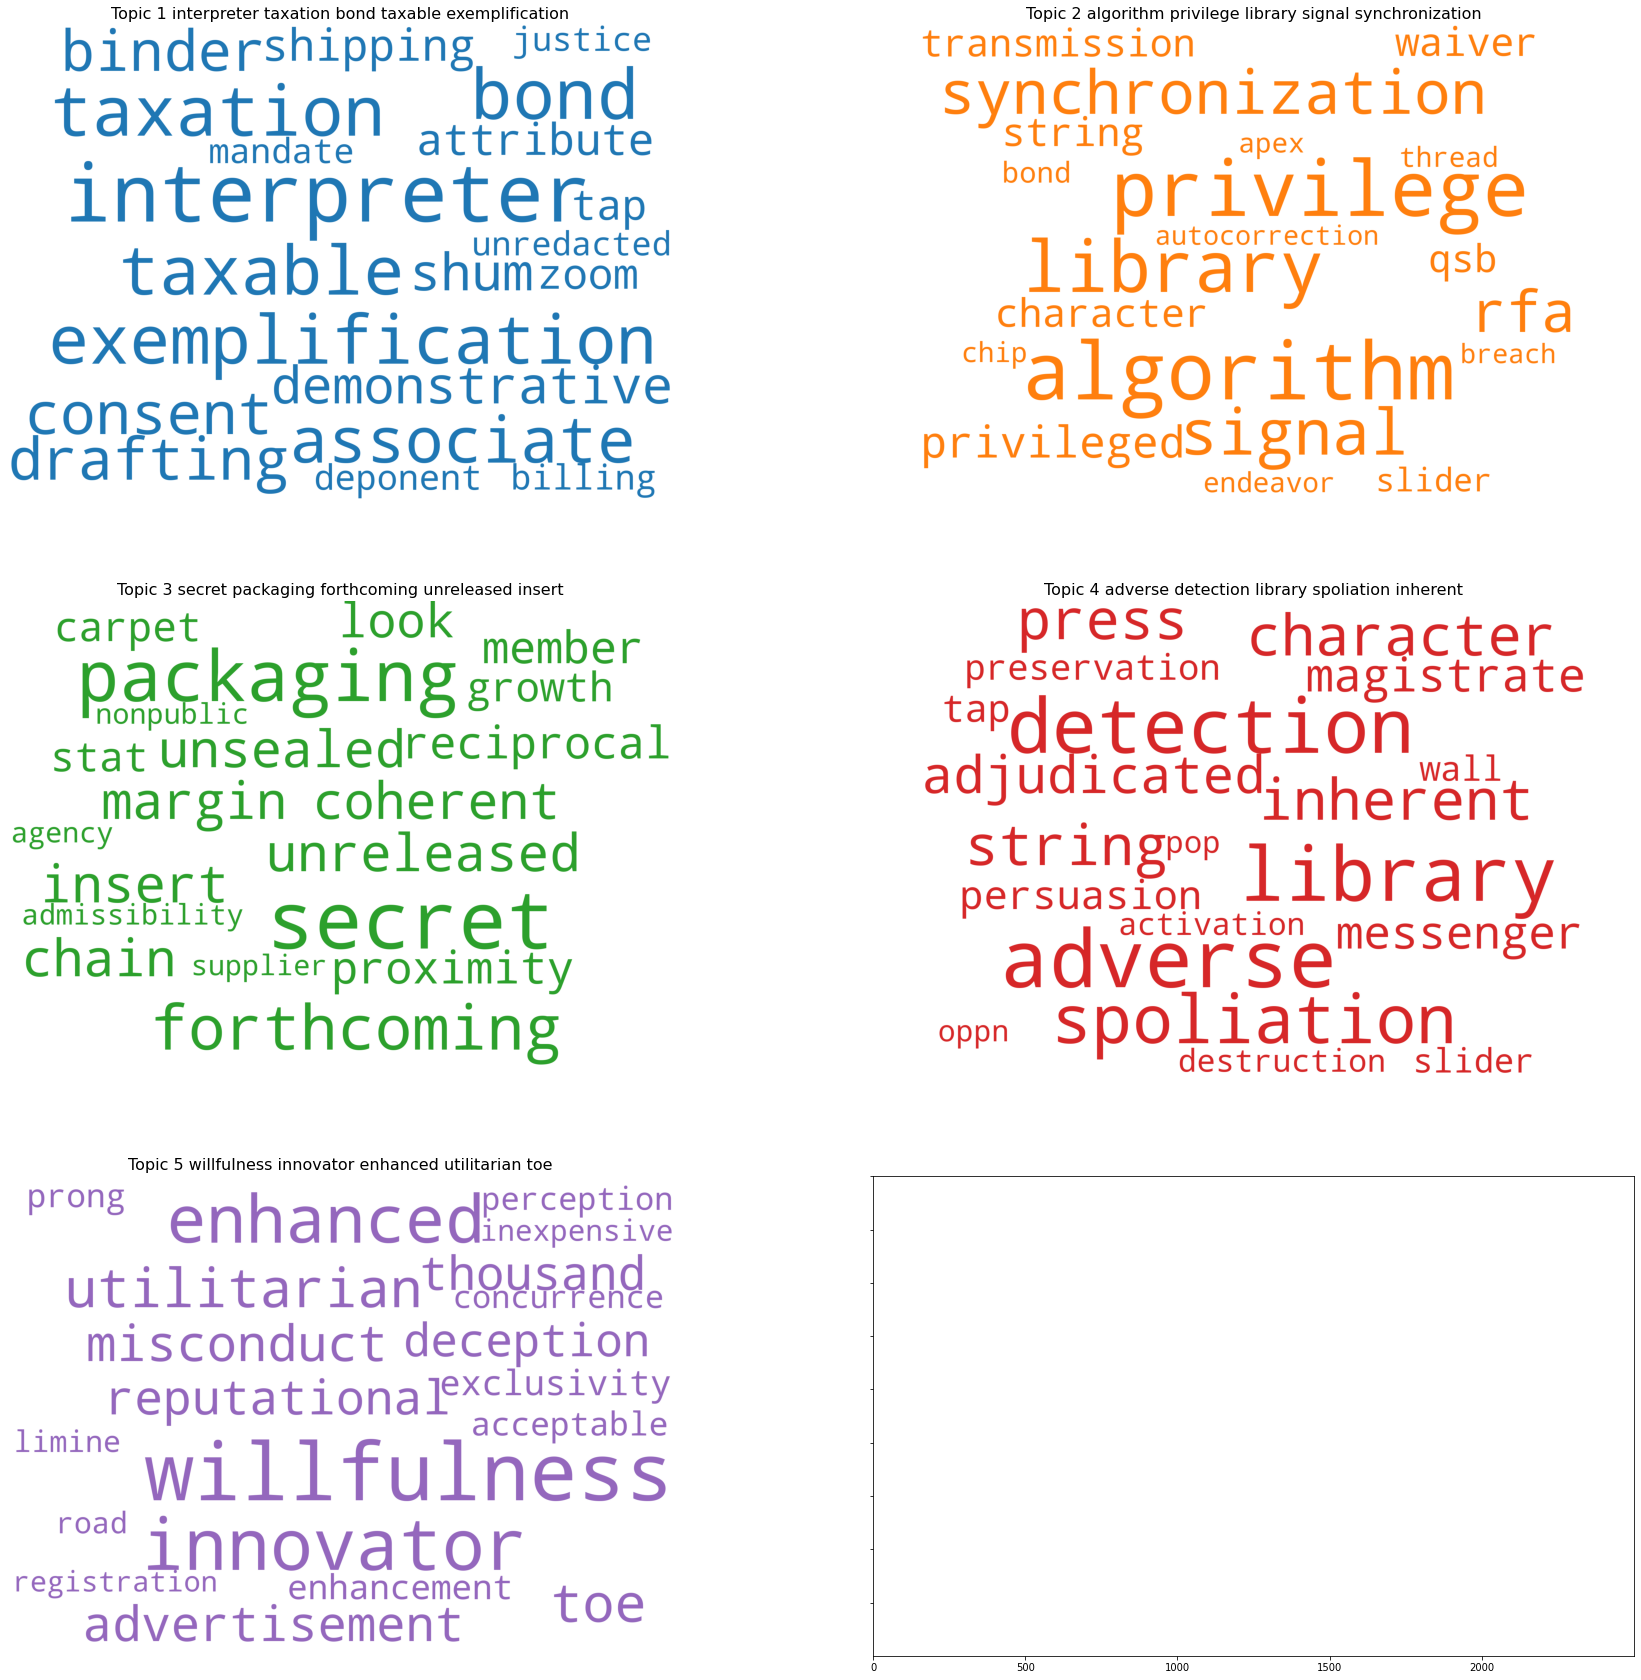

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

feature_names = count.get_feature_names()

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],#collocations=False,#
                  prefer_horizontal=1.0)


topics =  [  {  feature_names[i]:int(ii*100)  for i,ii in zip(topic.argsort()[::-1],np.sort(topic)[::-1]) } for topic_idx, topic in enumerate(lda_model.components_)]
 
fig, axes = plt.subplots((len(lda_model.components_)+1)//2, 2, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i== len(topics):break
    fig.add_subplot(ax)
    
    topic_words = topics[i] 
 
    #print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1)+' '+" ".join(list(topic_words.keys())[:5]) , fontdict=dict(size=16))
    plt.gca().axis('off')